1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
[[ 832  834 1086  380 1191 1441]]


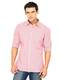

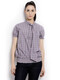

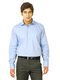

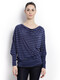

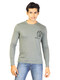

In [ ]:
import pickle
import tensorflow
import numpy as np
from numpy.linalg import norm
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import GlobalMaxPooling2D
from tensorflow.keras.applications.resnet50 import ResNet50,preprocess_input
from sklearn.neighbors import NearestNeighbors
import cv2
from google.colab.patches import cv2_imshow

feature_list = np.array(pickle.load(open("/content/drive/MyDrive/SOC '24 mentee/embeddings.pkl",'rb')))
filenames = pickle.load(open("/content/drive/MyDrive/SOC '24 mentee/filenames.pkl",'rb'))

model = ResNet50(weights='imagenet',include_top=False,input_shape=(224,224,3))
model.trainable = False

model = tensorflow.keras.Sequential([
    model,
    GlobalMaxPooling2D()
])

img = image.load_img("/content/drive/MyDrive/SOC '24 mentee/shirt.jpg",target_size=(224,224))
img_array = image.img_to_array(img)
expanded_img_array = np.expand_dims(img_array, axis=0)
preprocessed_img = preprocess_input(expanded_img_array)
result = model.predict(preprocessed_img).flatten()
normalized_result = result / norm(result)

neighbors = NearestNeighbors(n_neighbors=6,algorithm='brute',metric='euclidean')
neighbors.fit(feature_list)

distances,indices = neighbors.kneighbors([normalized_result])

print(indices)
import matplotlib.pyplot as plt
for file in indices[0][1:6]:
    temp_img = cv2.imread(filenames[file])
    cv2_imshow(temp_img)
    cv2.waitKey(0)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
